In [20]:
import pysd
#model = pysd.read_vensim('teacup.mdl')
model = pysd.load("teacup.py")
model.doc

,Real Name,Py Name,Subscripts,Units,Limits,Type,Subtype,Comment
0,Characteristic Time,characteristic_time,None,Minutes,"(0.0, nan)",Constant,Normal,How long will it take the teacup to cool 1/e o...
1,FINAL TIME,final_time,None,Minute,"(nan, nan)",Constant,Normal,The final time for the simulation.
2,Heat Loss to Room,heat_loss_to_room,None,Degrees Fahrenheit/Minute,"(nan, nan)",Auxiliary,Normal,This is the rate at which heat flows from the ...
3,INITIAL TIME,initial_time,None,Minute,"(nan, nan)",Constant,Normal,The initial time for the simulation.
4,Room Temperature,room_temperature,None,Degrees Fahrenheit,"(-459.67, nan)",Constant,Normal,Put in a check to ensure the room temperature ...
5,SAVEPER,saveper,None,Minute,"(0.0, nan)",Auxiliary,Normal,The frequency with which output is stored.
6,TIME STEP,time_step,None,Minute,"(0.0, nan)",Constant,Normal,The time step for the simulation.
7,Teacup Temperature,teacup_temperature,None,Degrees Fahrenheit,"(32.0, 212.0)",Stateful,Integ,The model is only valid for the liquid phase o...
8,Time,time,None,None,"(nan, nan)",None,None,Current time of the model.


In [37]:
from sklearn.svm import SVR
regression = SVR()

X_Training = [
    [10], 
    [11],
    [12]
]

X_Test = [
    [10],
    [11]
]

Y_Training = [1, 2, 3]  

regression.fit(X_Training, Y_Training)

regression.predict(X_Test)


2.0

In [40]:
def new_heatflow_function():
    tea_temp = model.components.teacup_temperature()
    room_temp = model.components.room_temperature()
    return regression.predict([[tea_temp], [room_temp]])[0]

model.set_components({'heat_loss_to_room': new_heatflow_function})

In [41]:
stocks = model.run()
stocks

,FINAL TIME,INITIAL TIME,SAVEPER,TIME STEP,Characteristic Time,Heat Loss to Room,Room Temperature,Teacup Temperature
0.000,30,0,0.125,0.125,10,2.0,35,180.00
0.125,30,0,0.125,0.125,10,2.0,35,179.75
0.250,30,0,0.125,0.125,10,2.0,35,179.50
0.375,30,0,0.125,0.125,10,2.0,35,179.25
0.500,30,0,0.125,0.125,10,2.0,35,179.00
...,...,...,...,...,...,...,...,...
29.500,30,0,0.125,0.125,10,2.0,35,121.00
29.625,30,0,0.125,0.125,10,2.0,35,120.75
29.750,30,0,0.125,0.125,10,2.0,35,120.50
29.875,30,0,0.125,0.125,10,2.0,35,120.25


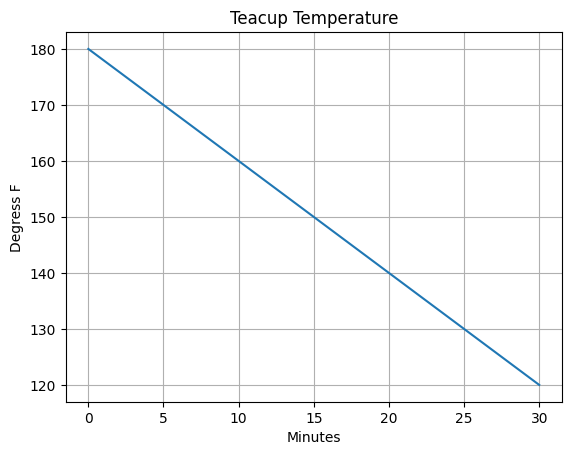

In [42]:
import matplotlib.pyplot as plt
stocks["Teacup Temperature"].plot()
plt.title("Teacup Temperature")
plt.ylabel("Degress F")
plt.xlabel("Minutes")
plt.grid()